# k-Nearest Neighbours (kNN)

The kNN algorithm is simple - given a labeled sample set data, and a new sample, predict the label of this sample by using majority vote (or averaging) over the labels of the k-nearest neighbour of the new data in the sample set.

For this task, we assume each data point is an n-dimensional point in $\mathbb{R}^n$, and each label is either 0 or 1.

We use simple Euclidean distance to measure the distance between two points. In case two points in the training have the same distance from a given point to predict, the nearest would be the one appearing first in the training set. 

We use majority vote between all kNN of a point to predict its label. In case the vote of all kNN is tied, the prediction is random.

In [1]:
import numpy as np
from scipy.stats import mode

import matplotlib.pyplot as plt
plt.style.use("bmh")

from sklearn.model_selection import train_test_split

In [8]:
class kNNClassifier:
    
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        '''
        Fitting the model is done by saving all given points
        '''
        assert X.shape[0] == y.shape[0]
        self.X = X
        self.y = np.array(y)

    def predict(self, X):
        '''
        Prediction is done by calculating the n-nearest points and taking the label with majority vote
        '''
        # create_dist matrix
        broadcast_mat = np.expand_dims(X , axis=1) - self.X
        # get distance per item
        dist_mat = np.linalg.norm(broadcast_mat, axis=-1)
        # get n_neighbors nearest neighbors labels
        label_counts = self.y[np.argpartition(dist_mat, self.n_neighbors)[:,:self.n_neighbors]]
        # return the most common label for each point
        return mode(label_counts, axis=1).mode.flatten()


In [9]:
def true_boundary_voting_pred(x, y):
    return y-0.1*((x-5)**3-x**2+(x-6)**2+80)

def generate_data(m, seed=None):
    # if seed is not None, this function will always generate the same data
    np.random.seed(seed) 
    X = np.random.uniform(low=0.0, high=10.0, size=(m,2))
    y = np.sign(true_boundary_voting_pred(X[:,0], X[:,1]))
    y[y==0] = 1
    samples_to_flip = np.random.randint(0,m//10)
    flip_ind = np.random.choice(m, samples_to_flip, replace=False)
    y[flip_ind] = -y[flip_ind]
    return X, y

def plot_labeled_data(X, y):
    a = (y==1)
    b = (y==-1)
    plt.scatter(X[a,0], X[a,1], c='r')
    plt.scatter(X[b,0], X[b,1], c='b')

    plt.xlim([0, 10]);
    plt.ylim([0, 10]);
    plt.plot(np.linspace(0,10,1000), -true_boundary_voting_pred(np.linspace(0,10,1000), np.zeros(1000)), linewidth=2, c='k')

## Evaluate kNN algorithm on artificial data
kNN is a **non-parametric** in the sense that no inner parameter of the model is learned by the sample training set (or maybe you could say that the number of parameters increases with the size of the sample set). However, the number of neighbours **k is considered a hyper-parameter**, and choosing the optimal value for it, is choosing the balance between bias and variance.

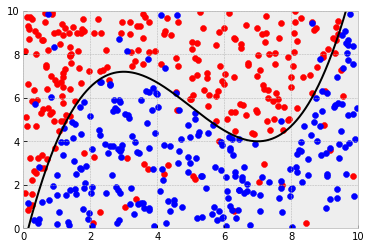

In [18]:
display_X, display_y = generate_data(m=500, seed=42)
plot_labeled_data(display_X, display_y)

In [22]:
display_X, display_y = generate_data(m=100000, seed=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### Train on training set

[]

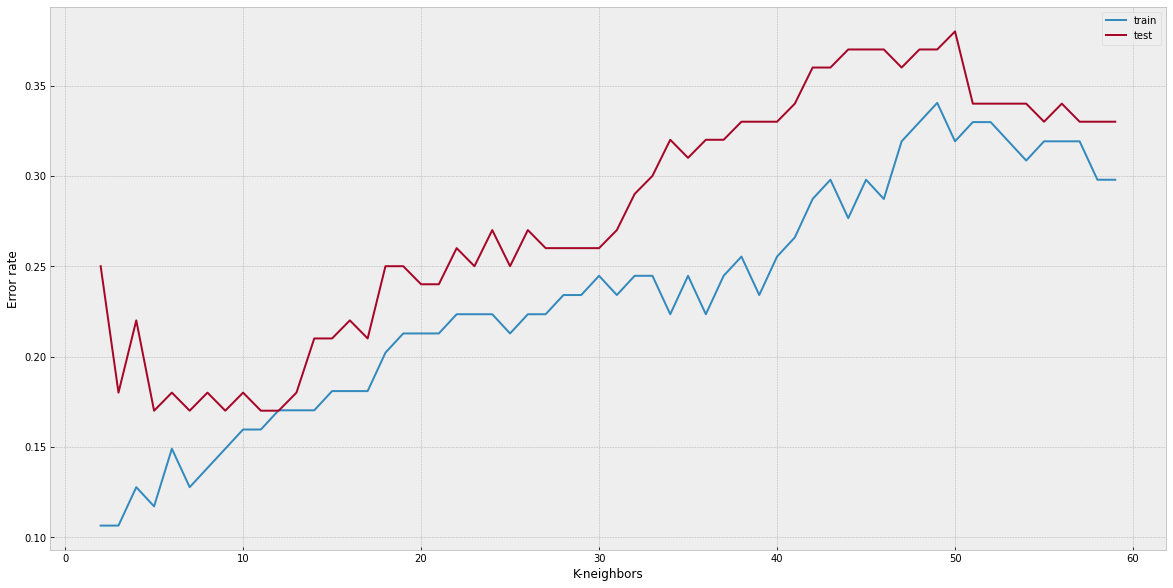

In [33]:
train_err = []
test_err = []
k_list = [i for i in range(2, 60, 1)]
for k in k_list:
    knn = kNNClassifier(k)
    knn.fit(X_train, y_train)

    train_err.append(sum(knn.predict(X_train) != y_train) / y_train.shape[0])
    test_err.append(sum(knn.predict(X_test) != y_test) / y_test.shape[0])

plt.figure(figsize=(20,10))
train, = plt.plot(k_list, train_err, label='train')
test, = plt.plot(k_list, test_err, label='test')
plt.legend(handles=[train, test])
plt.xlabel('K-neighbors')
plt.ylabel('Error rate')
plt.plot()

### 3. Using cross validation

[]

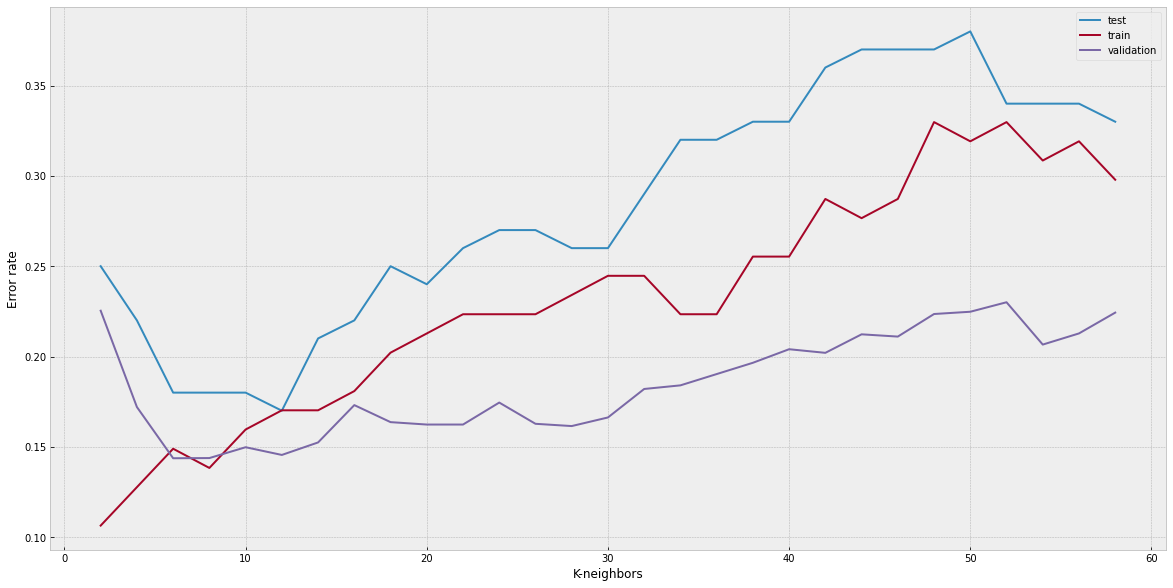

In [32]:
val_err = []
test_err = []
train_err = []
k_list = [i for i in range(2, 60, 2)]
CV = 5
for k in k_list:
    val_err_sum = 0
    test_err_sum = 0
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for cv in range(CV):
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
        knn = kNNClassifier(k)
        knn.fit(X_train, y_train)
        
        val_err_sum += sum(knn.predict(X_val) != y_val) / y_val.shape[0]

    val_err.append(val_err_sum / CV)
    train_err.append(sum(knn.predict(X_train) != y_train) / y_train.shape[0])
    test_err.append(sum(knn.predict(X_test) != y_test) / y_test.shape[0])
 
plt.figure(figsize=(20,10))
test, = plt.plot(k_list, test_err, label='test')
train, = plt.plot(k_list, train_err, label='train')
val, = plt.plot(k_list, val_err, label='validation')
plt.legend(handles=[test, train, val])
plt.xlabel('K-neighbors')
plt.ylabel('Error rate')